In [6]:
import networkx as nx
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import random
import itertools
%matplotlib inline

# Sistemas Dinámicos en Redes (Modelos Epidemiológicos)


## Implementación Espacial

Cree una población de 10.000 individuos en un espacio cuadrado (100 x 100). Cada individuo esta conectado por un enlace con los individuos adyacentes (los 8 alrededor).

In [11]:
factor = 100

x = np.arange(0, factor)
y = np.arange(0, factor)
iterables = [x, y]


edges = {}
i = 0
j = 0
for i in range(len(x)):
    for j in range(len(x)):
        a = factor * (i) + j
        edges[a] = {}

for i in range(len(x) - 1):
    a = factor * (i) + j
    edges[a] = {}
    for j in range(len(y) - 1):
        edges[factor * (i) + j][factor * (i + 1) + (j + 1)] = 1
        edges[factor * (i) + j][factor * (i) + (j + 1)] = 1
        edges[factor * (i) + j][factor * (i + 1) + (j)] = 1
        edges[factor * (i) + (j+1)][factor * (i + 1) + (j + 1)] = 1
        edges[factor * (i) + (j+1)][factor * (i + 1) + (j)] = 1
        edges[factor * (i+1) + (j+1)][factor * (i + 1) + (j)] = 1

In [13]:
G = nx.Graph()
for i in edges.keys():
    for j in edges[i].keys():
        if edges[i][j] == 1:
            G.add_edge(i,j)

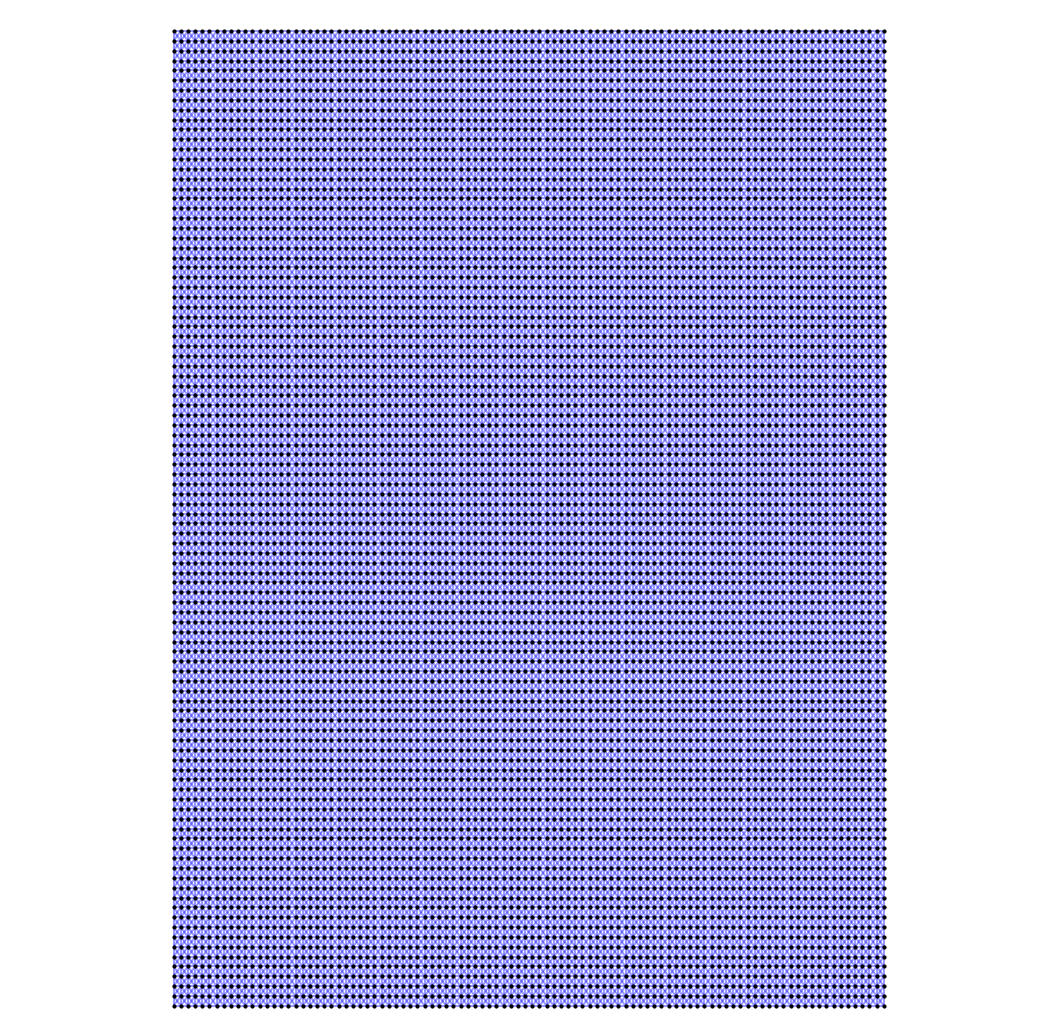

In [20]:
poss = nx.circular_layout(G) # positions for all nodes
plt.figure(figsize=(18, 18))
plt.ylim([-0.5,101.5])
plt.axis('off')

for i in range(len(x)):
    for j in range(len(x)):
        a = factor * (i) + j
        poss[a] = np.array((x[i], y[j]))

nx.draw_networkx_nodes(G,poss,node_size=10, node_color='black')
nx.draw_networkx_edges(G, poss, width=2, alpha=0.4, edge_color='blue')

### Implementar el modelo epidemiológico SI

Graficar la cantidad de Sanos y de Infectados en cada periodo de tiempo $t$

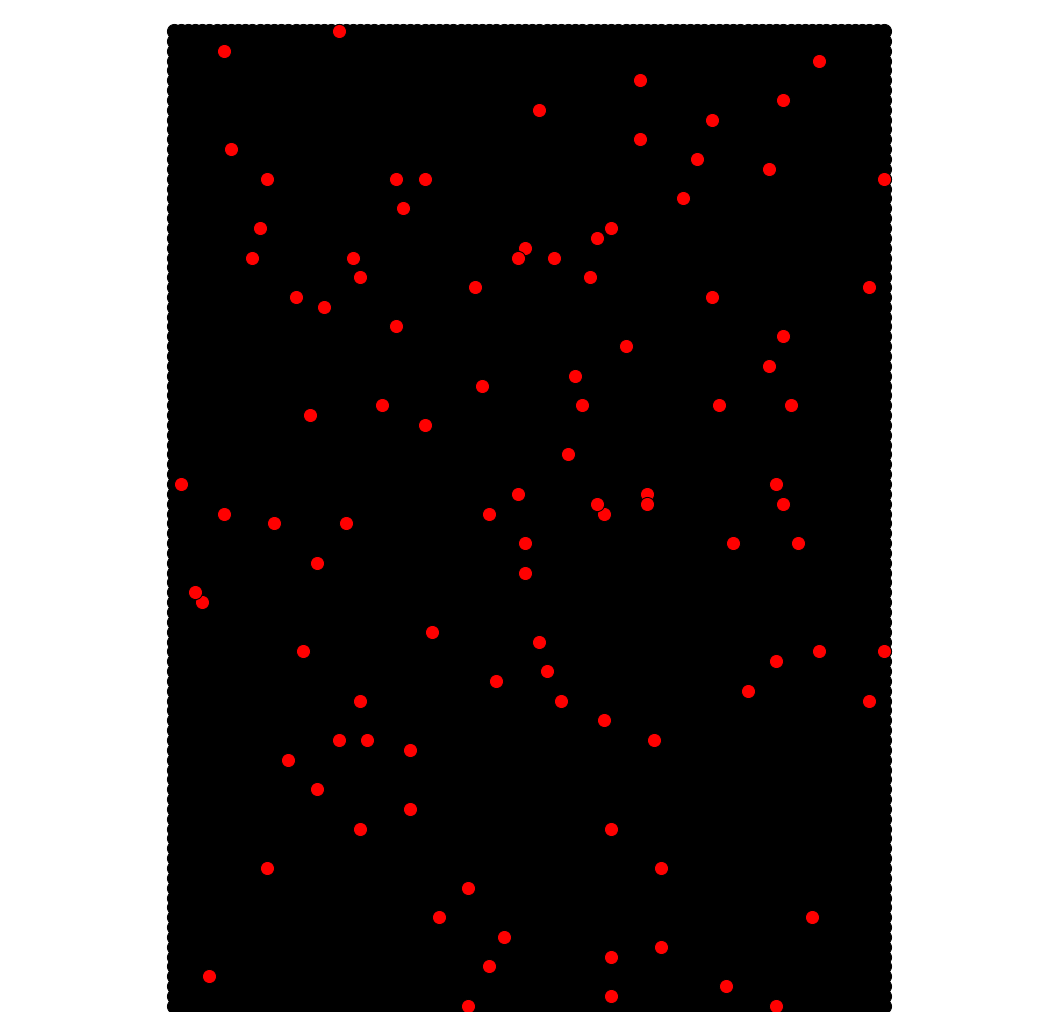

In [23]:
plt.figure(figsize=(18, 18))
plt.ylim([-0.5,101.5])
plt.axis('off')

nx.draw_networkx_nodes(G,poss,node_size=200, node_color='black')
nx.draw_networkx_edges(G, poss, width=4, alpha=0.4, edge_color='blue')


Infectados = random.sample( edges.keys(), 1)
for i in range(100):
    Infectados = random.sample(edges.keys(), 1)
    nx.draw_networkx_nodes(G,poss,node_size=200,nodelist=Infectados, node_color='red')
    plt.pause(0.05)

### Elija otro modelo Epidemiológico e implementelo

Grafique la cantidad de Sanos, Infectados y resistentes para cada tiempo $t$ según corresponda al modelo

### Efectos de parametros e infectados iniciales
Grafique con varios parametros y explique cómo la posición de diferentes infectados iniciales (i.e. ejecute varias veces) afecta el comportamiento en la transmisión de la enfermedad

## Red Social

Utilizando una red social (bajada de SNAP o cualquier otro sitio) aplique el modelo epidemiológico SI y el otro modelo epidemiológico implementado.

### Efectos de los parametros e infectados iniciales

Grafique con varios parametros y explique cuales parametros de centralidad de los infectados iniciales afecta la dinámica del sistema (i.e. tiempo de transmisión, tiempo de enfermar a todas las personas, etc)